In [12]:
import json
import sys
from math import cos, pi, sin, sqrt
from typing import Callable

import matplotlib as mpl
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.interpolate import CubicSpline

mpl.rcParams['text.usetex'] = True
mpl.rcParams['figure.dpi'] = 96
location = "/home/gsalinas/GitHub/angular/PyTransport"
sys.path.append(location)

import PyTransSetup

PyTransSetup.pathSet()

import PyTransAngular as PyT

In [13]:
def get_background(initial: np.ndarray, params: dict, Nrange: tuple, tol: float = 1e-30) -> np.ndarray:
    Ns = np.linspace(Nrange[0], Nrange[1], Nrange[2], endpoint=True)
    pval = np.array(list(params.values()))
    tols = np.array([tol, tol])
    back = PyT.backEvolve(Ns, initial, pval, tols, True)
    return back

def get_background_func(back: np.ndarray) -> Callable:
    Ns, phis, phidots = back[:, 0], back[:, 1:3], back[:, 3:]

    return lambda N: CubicSpline(Ns, phis, extrapolate=True)(N), \
            lambda N: CubicSpline(Ns, phidots, extrapolate=True)(N)

In [14]:
params = {'alpha': 1/600, 'R': 9, 'mphi': 2.e-5}
    
r0, theta0 = 0.99, pi/4
phi0 = r0 * np.array([cos(theta0), sin(theta0)])
phidot0 = np.zeros(2)
initial = np.concatenate((phi0, phidot0))

Nrange = (0, 100, 500_000)
back = get_background(initial, params, Nrange)
phi, phidot = get_background_func(back)

458116


In [15]:
Nini, Nend = back[0, 0], back[-1, 0]
print(f'Number of e-folds: {Nend:.3}')
Nexit = Nend - 55

Number of e-folds: 91.6


In [23]:
initial2 = np.concatenate((phi(Nexit), phidot(Nexit)))
initial2

array([ 9.12322519e-01,  4.03842017e-01,  1.11085341e-09, -2.48561995e-09])

In [47]:
back2 = get_background(initial2 + np.array([1e-5, 0., 0., 0.]), params, Nrange)
phi2, phidot2 = get_background_func(back2)
Nend2 = back2[-1, 0]

275059


(0.912, 0.913, 0.4, 0.405)

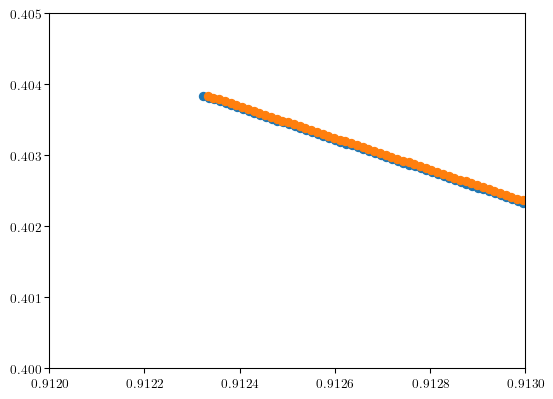

In [50]:
num_points = 10_000
Nplot = np.linspace(Nexit, Nend, num_points)
Nplot2 = np.linspace(0, Nend2, num_points)
plt.scatter(phi(Nplot).T[0], phi(Nplot).T[1])
plt.scatter(phi2(Nplot2).T[0], phi2(Nplot2).T[1])
plt.axis([0.912, 0.913, 0.4, 0.405])